In [1]:
import yfinance as yf
import pandas as pd

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = "2025-08-27" # Using today's date as the end

try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RELIANCE.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


❌ Download failed. The returned data was empty.


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...
Fetching news for month: 2020-02...
Fetching news for month: 2020-03...
Fetching news for month: 2020-04...
Fetching news for month: 2020-05...
Fetching news for month: 2020-06...
Fetching news for month: 2020-07...
Fetching news for month: 2020-08...
Fetching news for month: 2020-09...
Fetching news for month: 2020-10...
Fetching news for month: 2020-11...
Fetching news for month: 2020-12...


09/30/2025 06:57:07 PM - ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Fetching news for month: 2021-01...
Fetching news for month: 2021-02...
Fetching news for month: 2021-03...
Fetching news for month: 2021-04...
Fetching news for month: 2021-05...
Fetching news for month: 2021-06...
Fetching news for month: 2021-07...
Fetching news for month: 2021-08...
Fetching news for month: 2021-09...
Fetching news for month: 2021-10...
Fetching news for month: 2021-11...


09/30/2025 07:08:44 PM - ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Fetching news for month: 2021-12...
Fetching news for month: 2022-01...
Fetching news for month: 2022-02...
Fetching news for month: 2022-03...
Fetching news for month: 2022-04...
Fetching news for month: 2022-05...
Fetching news for month: 2022-06...
Fetching news for month: 2022-07...
Fetching news for month: 2022-08...
Fetching news for month: 2022-09...
Fetching news for month: 2022-10...
Fetching news for month: 2022-11...
Fetching news for month: 2022-12...
Fetching news for month: 2023-01...
Fetching news for month: 2023-02...
Fetching news for month: 2023-03...
Fetching news for month: 2023-04...
Fetching news for month: 2023-05...
Fetching news for month: 2023-06...
Fetching news for month: 2023-07...
Fetching news for month: 2023-08...
Fetching news for month: 2023-09...
Fetching news for month: 2023-10...
Fetching news for month: 2023-11...
Fetching news for month: 2023-12...
Fetching news for month: 2024-01...
Fetching news for month: 2024-02...
Fetching news for month: 202

,date,title,source
0,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
1,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."
2,"Thu, 02 Jan 2020 08:00:00 GMT",Mukesh Ambani: Asia's richest man takes on ret...,"{'href': 'https://www.bbc.com', 'title': 'BBC'}"
3,"Thu, 30 Jan 2020 08:00:00 GMT",RIL lays out road with plastic waste - The Hindu,"{'href': 'https://www.thehindu.com', 'title': ..."
4,"Mon, 27 Jan 2020 08:00:00 GMT",Reliance Industries Ltd Stock Analysis | Why R...,"{'href': 'https://blog.investyadnya.in', 'titl..."


In [9]:
!pip install pandas_ta

In [ ]:
!pip install --upgrade pandas_ta

In [5]:
import pandas as pd
import pandas_ta as ta

file_path = "reliance_stock_data_5_years.csv"

# --- THE FIX ---
# This tells pandas to use the first column as the index
# AND to skip the two junk rows (row 1 and 2 from your screenshot) right after the header.
stock_df = pd.read_csv(
    file_path,
    index_col=0,
    parse_dates=True,
    skiprows=[1, 2] # This is the key fix
)

# We will then correctly name the index 'Date' for future use
stock_df.index.name = 'Date'

# Calculate the 14-period SMA and RSI using pandas_ta
stock_df.ta.sma(length=14, append=True)
stock_df.ta.rsi(length=14, append=True)

# Remove the first few rows that have missing indicator values
stock_df.dropna(inplace=True)

print("✅ Technical indicators (SMA_14 and RSI_14) have been calculated and added.")
display(stock_df.head())

✅ Technical indicators (SMA_14 and RSI_14) have been calculated and added.


,Close,High,Low,Open,Volume,SMA_14,RSI_14
Date,,,,,,,
2020-01-27,673.959839,681.967470,673.266431,677.695280,13387750,686.341910,40.260739
2020-01-28,658.391907,675.503182,654.745994,674.876846,24532236,685.019021,31.133326
2020-01-29,662.015503,668.524454,654.947287,659.420810,24746565,682.841370,34.836418
2020-01-30,645.866028,661.948361,644.188472,661.635222,22402689,679.521375,27.690089
2020-01-31,631.506042,650.115939,629.515348,650.004075,34750310,675.301876,23.143735


In [6]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [7]:
!conda install -c conda-forge nltk -y

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

✅ The clean_text function is now ready to use.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devGo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devGo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\devGo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.
✅ Text cleaning complete.


,title,cleaned_title
0,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
1,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
2,Mukesh Ambani: Asia's richest man takes on ret...,mukesh ambani asia richest man take retail gia...
3,RIL lays out road with plastic waste - The Hindu,ril lay road plastic waste hindu
4,Reliance Industries Ltd Stock Analysis | Why R...,reliance industry ltd stock analysis reliance ...


In [10]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Found cache directory at: C:\Users\devGo\.cache\huggingface
✅ Hugging Face cache has been cleared successfully.


In [11]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

C:\Users\devGo\.conda\envs\capstone_v2\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\devGo\.cache\huggingface\hub\models--ProsusAI--finbert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
09/30/2025 08:00:54 PM - Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.

Starting sentiment analysis with FinBERT. This will take a very long time...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
09/30/2025 08:01:42 PM - Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/5983 headlines...
  Processed 128/5983 headlines...
  Processed 192/5983 headlines...
  Processed 256/5983 headlines...
  Processed 320/5983 headlines...
  Processed 384/5983 headlines...
  Processed 448/5983 headlines...
  Processed 512/5983 headlines...
  Processed 576/5983 headlines...
  Processed 640/5983 headlines...
  Processed 704/5983 headlines...
  Processed 768/5983 headlines...
  Processed 832/5983 headlines...
  Processed 896/5983 headlines...
  Processed 960/5983 headlines...
  Processed 1024/5983 headlines...
  Processed 1088/5983 headlines...
  Processed 1152/5983 headlines...
  Processed 1216/5983 headlines...
  Processed 1280/5983 headlines...
  Processed 1344/5983 headlines...
  Processed 1408/5983 headlines...
  Processed 1472/5983 headlines...
  Processed 1536/5983 headlines...
  Processed 1600/5983 headlines...
  Processed 1664/5983 headlines...
  Processed 1728/5983 headlines...
  Processed 1792/5983 headlines...
  Processed 1856/5983 headlines...
 

,cleaned_title,finbert_sentiment
0,mukesh ambanis reliance industry india answer ...,neutral
1,reliance industry post record q profit r crore...,positive
2,mukesh ambani asia richest man take retail gia...,neutral
3,ril lay road plastic waste hindu,neutral
4,reliance industry ltd stock analysis reliance ...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [14]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
# --- THE FIX IS HERE ---
# Load stock_df using the first column as the index to avoid the 'Date' not found error.
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")

# --- 2. Process the Stock Data (Add Indicators Again) ---
import pandas_ta as ta
stock_df.ta.sma(length=14, append=True)
stock_df.ta.rsi(length=14, append=True)
stock_df.dropna(inplace=True)


# --- 3. Process the News Data ---
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])


# --- 4. Merge the Datasets ---
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True)
final_df.dropna(inplace=True)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'


print("✅✅✅ Final master dataset created successfully!")
display(final_df.head())

✅✅✅ Final master dataset created successfully!


C:\Users\devGo\AppData\Local\Temp\ipykernel_17328\920356968.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True)
C:\Users\devGo\AppData\Local\Temp\ipykernel_17328\920356968.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True)


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-27,673.959839,681.967470,673.266431,677.695280,13387750,686.341910,40.260739,0.0
2020-01-28,658.391907,675.503182,654.745994,674.876846,24532236,685.019021,31.133326,0.0
2020-01-29,662.015503,668.524454,654.947287,659.420810,24746565,682.841370,34.836418,0.5
2020-01-30,645.866028,661.948361,644.188472,661.635222,22402689,679.521375,27.690089,0.0
2020-01-31,631.506042,650.115939,629.515348,650.004075,34750310,675.301876,23.143735,0.0


In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-27,0.233298,0.093828,0.207331,0.361530,0.50
2020-01-28,0.220256,0.171935,0.206140,0.224045,0.50
2020-01-29,0.223291,0.173437,0.204180,0.279824,0.75
2020-01-30,0.209762,0.157010,0.201191,0.172180,0.50
2020-01-31,0.197732,0.243548,0.197393,0.103700,0.50


In [16]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1323, 60, 5)
Shape of y_data: (1323,)


In [17]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1058, 60, 5)
y_train shape: (1058,)
X_test shape: (265, 60, 5)
y_test shape: (265,)


In [18]:
!conda install tensorflow -y

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture
model = Sequential()

# Add the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
# It has 1 unit because we are predicting 1 value (the 'Close' price)
model.add(Dense(units=1))

# Compile the model
# This configures the model for training
model.compile(optimizer='adam', loss='mean_squared_error')

print("✅ LSTM Model has been successfully built and compiled.")

# Display the model's architecture
model.summary()

✅ LSTM Model has been successfully built and compiled.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_______________________________________________________________

In [20]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50
34/34 [==============================] - 21s 339ms/step - loss: 0.0581 - val_loss: 0.0028
Epoch 2/50
34/34 [==============================] - 8s 229ms/step - loss: 0.0077 - val_loss: 0.0052
Epoch 3/50
34/34 [==============================] - 8s 239ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/50
34/34 [==============================] - 8s 242ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 5/50
34/34 [==============================] - 9s 268ms/step - loss: 0.0051 - val_loss: 0.0012
Epoch 6/50
34/34 [==============================] - 8s 249ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 7/50
34/34 [==============================] - 7s 213ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 8/50
34/34 [==============================] - 7s 217ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 9/50
34/34 [==============================] - 6s 167ms/step - loss: 0.0041 - val_loss: 9.2395e-04
Epoch 10/50
34/34 [=================

Making predictions on the test data...
9/9 [==============================] - 3s 68ms/step
✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 22.46 INR
R-squared (R²) Score: 0.91


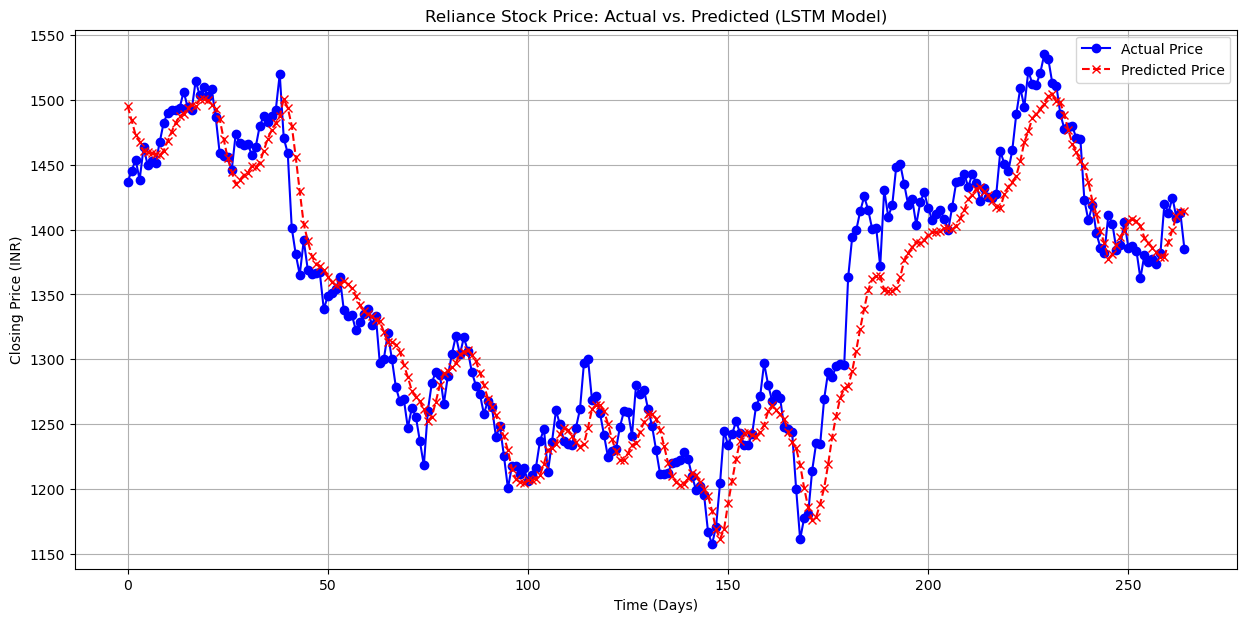

In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [22]:
import joblib

# Save the trained LSTM model using the official Keras format
model.save('lstm_model.keras')

# The scaler object is simple, so joblib is still the correct tool for it
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model has been saved in the correct .keras format.")
print("✅ Scaler has been saved.")

✅ Model has been saved in the correct .keras format.
✅ Scaler has been saved.


In [23]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import yfinance as yf
from gnews import GNews
import pandas_ta as ta
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from transformers import AutoTokenizer, BertForSequenceClassification
import torch
from tensorflow.keras.models import load_model # <-- IMPORTANT CHANGE

# --- Load Saved Objects ---
# --- IMPORTANT CHANGE: Load the model using Keras's load_model ---
model = load_model('lstm_model.keras')
scaler = joblib.load('scaler.pkl')

# --- Helper Functions (from our notebook) ---
# Use st.cache_data for functions that return data to speed up the app
@st.cache_data
def get_stock_data(ticker):
    return yf.download(ticker, period="6mo")

@st.cache_data
def get_news_data(query):
    google_news = GNews(language='en', country='IN', period='2d') # Search last 2 days for recent news
    return pd.DataFrame(google_news.get_news(query))

# Use st.cache_resource for objects that should not be reloaded, like models
@st.cache_resource
def get_finbert_model():
    tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
    model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
    return tokenizer, model

def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    if not isinstance(text, str): return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned_words)

def get_finbert_sentiment(text_list, tokenizer, model):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]

# --- Streamlit App ---
st.title("Reliance Industries Stock Trend Predictor")
st.write("This app uses a Deep Learning (LSTM) model to predict the next day's stock price based on historical prices, technical indicators, and the sentiment of recent news.")

if st.button("Predict Tomorrow's Trend"):
    with st.spinner("Running prediction pipeline... This may take a few minutes the first time."):
        
        # --- 1. Fetch & Process Data ---
        st.info("Step 1: Fetching latest stock and news data...")
        stock_df = get_stock_data("RELIANCE.NS")
        news_df = get_news_data('Reliance Industries')

        # --- 2. Feature Engineering ---
        st.info("Step 2: Calculating technical indicators and news sentiment...")
        stock_df.ta.sma(length=14, append=True)
        stock_df.ta.rsi(length=14, append=True)
        
        news_df['cleaned_title'] = news_df['title'].apply(clean_text)
        tokenizer, finbert_model = get_finbert_model()
        sentiments = get_finbert_sentiment(news_df['cleaned_title'].tolist(), tokenizer, finbert_model)
        news_df['finbert_sentiment'] = sentiments
        
        sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
        news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
        today_sentiment = news_df['sentiment_score'].mean()

        # --- 3. Prepare Final Sequence for Model ---
        st.info("Step 3: Preparing data sequence for the LSTM model...")
        
        # Combine today's sentiment with historical data
        stock_df_with_sentiment = stock_df.copy()
        stock_df_with_sentiment['sentiment_score'] = today_sentiment # Apply today's sentiment to the history
        stock_df_with_sentiment.dropna(inplace=True)
        
        # Select the features and the last 60 days
        model_features = ['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']
        last_60_days = stock_df_with_sentiment[model_features].tail(60).values
        
        # Scale the sequence
        scaled_sequence = scaler.transform(last_60_days)
        X_pred = np.array([scaled_sequence])

        # --- 4. Make Prediction ---
        st.info("Step 4: Making the final prediction...")
        prediction_scaled = model.predict(X_pred)

        # Inverse transform to get actual price
        dummy_pred = np.zeros((1, 5))
        dummy_pred[:, 0] = prediction_scaled
        prediction_actual = scaler.inverse_transform(dummy_pred)[0, 0]

        # --- 5. Display Result ---
        st.success("Prediction Complete!")
        last_close_price = stock_df['Close'].iloc[-1]
        
        col1, col2 = st.columns(2)
        col1.metric(label="Last Closing Price", value=f"₹{last_close_price:.2f}")
        col2.metric(label="Predicted Price for Tomorrow", value=f"₹{prediction_actual:.2f}", delta=f"₹{prediction_actual - last_close_price:.2f}")

        if prediction_actual > last_close_price:
            st.write("### Conclusion: The model predicts the stock price will **GO UP** tomorrow. 📈")
        else:
            st.write("### Conclusion: The model predicts the stock price will **GO DOWN** tomorrow. 📉")

2025-09-30 20:18:56.992 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-30 20:18:56.996 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-30 20:18:56.999 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 20:18:57.435 
  command:

    streamlit run C:\Users\devGo\.conda\envs\capstone_v2\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-30 20:18:57.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 20:18:57.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 20:18:57.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 20:18:57.444 Thread 'MainT

In [24]:
import pandas as pd
import numpy as np
import pandas_ta as ta

# --- Load Your Two Processed Datasets ---
# This part assumes your notebook has loaded stock_df and news_df already.
# If you get an error, we will load them from the CSVs first.
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True, skiprows=[1, 2])
stock_df.index.name = 'Date'
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")

# --- Process the Stock Data ---
stock_df.ta.sma(length=14, append=True)
stock_df.ta.rsi(length=14, append=True)
stock_df.dropna(inplace=True)

# --- Process the News Data ---
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])

# --- Merge the Datasets ---
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True)
final_df.dropna(inplace=True)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'

# --- Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")

print("✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


C:\Users\devGo\AppData\Local\Temp\ipykernel_17328\3863550779.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True)
C:\Users\devGo\AppData\Local\Temp\ipykernel_17328\3863550779.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True)


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-29,662.015503,668.524454,654.947287,659.420810,24746565,682.841370,29.830257,0.500000
2020-01-30,645.866028,661.948361,644.188472,661.635222,22402689,679.521375,23.142147,0.000000
2020-01-31,631.506042,650.115939,629.515348,650.004075,34750310,675.301876,19.051780,0.000000
2020-02-03,619.807678,626.271955,609.764619,612.828990,30712290,670.703722,16.494116,-0.333333
2020-02-04,638.104492,640.833328,625.310200,626.294349,25383901,667.589831,31.894314,-0.666667


In [25]:
# Save the trained LSTM model in the .h5 format
model.save('lstm_model.h5')

print("✅ Model has been saved in the .h5 format.")

✅ Model has been saved in the .h5 format.
